In [5]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Social_Network_Ads.csv')

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

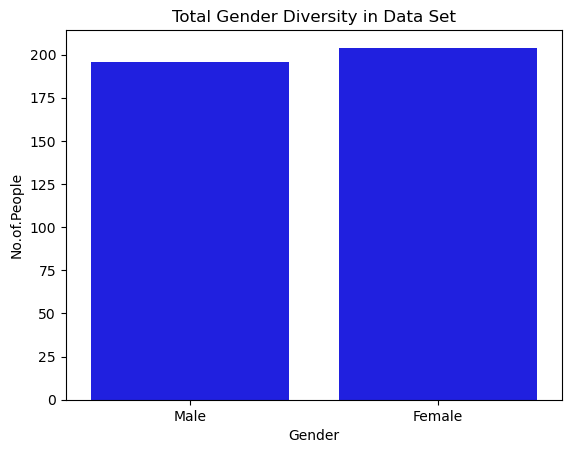

In [11]:
plt.title("Total Gender Diversity in Data Set")
sns.countplot(df,x=df['Gender'],color='blue')
plt.ylabel("No.of.People")
plt.show()

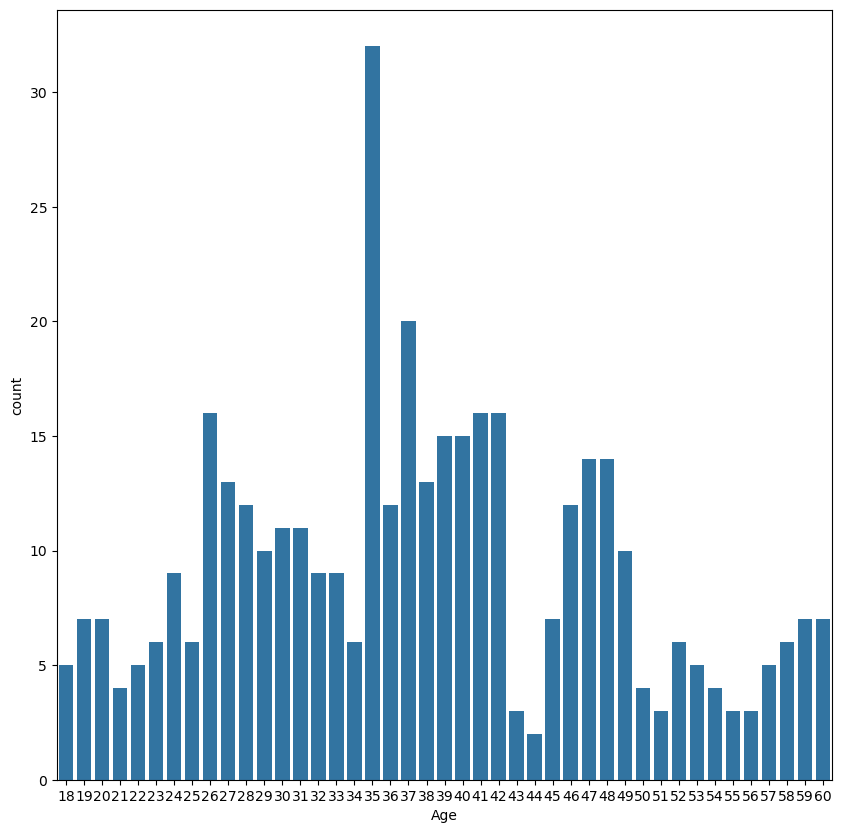

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(df,x=df['Age'])
plt.show()

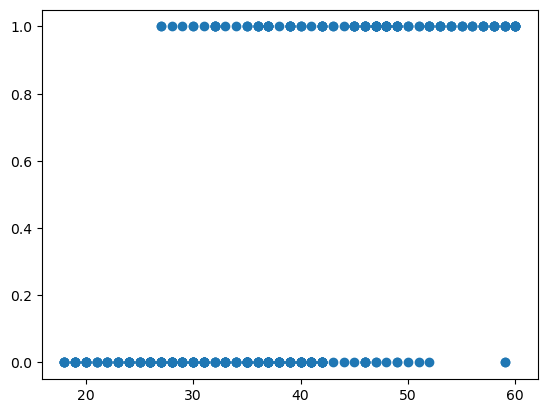

In [13]:
plt.scatter(x=df['Age'],y=df['Purchased'])

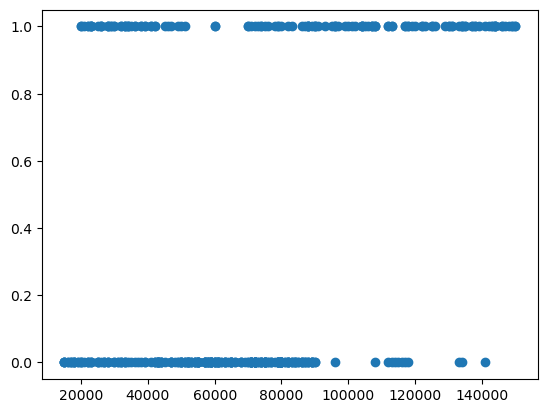

In [14]:
plt.scatter(x=df['EstimatedSalary'],y=df['Purchased'])

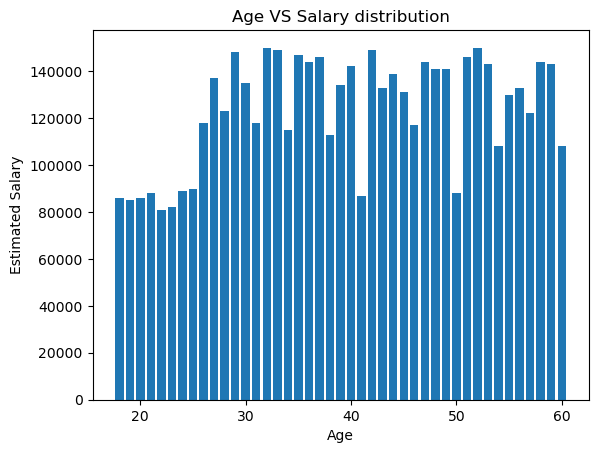

In [15]:
plt.bar(x=df['Age'],height=df['EstimatedSalary'])
plt.title("Age VS Salary distribution")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

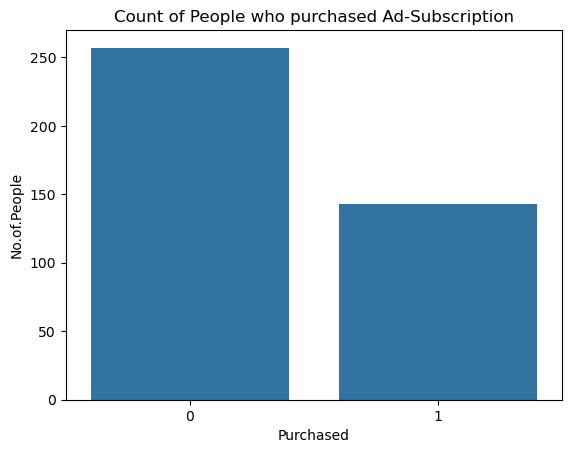

In [16]:
plt.title("Count of People who purchased Ad-Subscription")
sns.countplot(df,x=df['Purchased'])
plt.xlabel("Purchased")
plt.ylabel("No.of.People")
plt.show()

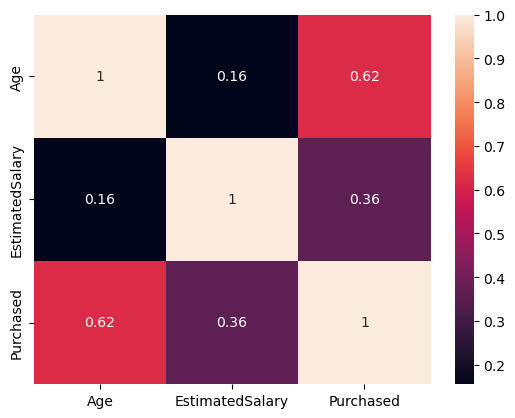

In [17]:
sns.heatmap(df.drop(columns=['Gender','User ID'],axis=1).corr(),annot=True)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()

In [20]:
df['Gender'] = encoder.fit_transform(df['Gender'])

In [21]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


<Axes: >

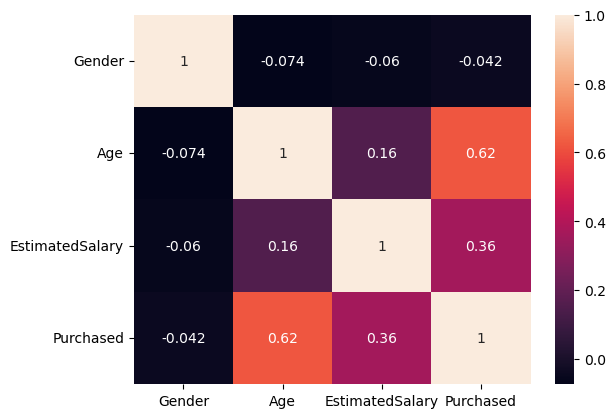

In [22]:
sns.heatmap(df.drop(columns=['User ID'],axis=1).corr(),annot=True)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(columns=['User ID','Purchased'],axis=1)

In [25]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [26]:
y=df['Purchased']

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X = scaler.fit_transform(X)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
model= LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [36]:
cm=confusion_matrix(y_test,y_pred,labels=model.classes_)

In [37]:
disp=ConfusionMatrixDisplay(cm,display_labels=model.classes_)

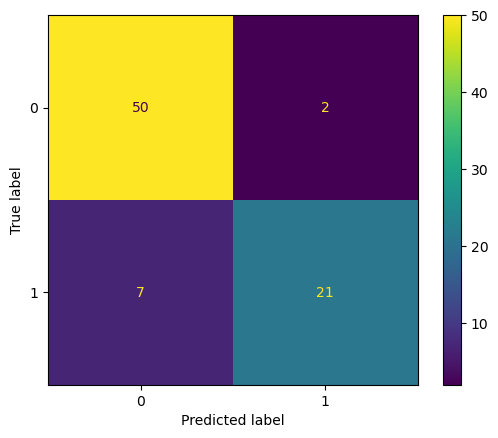

In [38]:
disp.plot()
plt.show()

## Suppoert Vector Machine (SVM)

In [39]:
from sklearn.svm import SVC

In [40]:
model_svc=SVC()

In [41]:
model_svc.fit(X_train,y_train)

SVC()

In [42]:
y_pred=model_svc.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [44]:
cm=confusion_matrix(y_test,y_pred,labels=model_svc.classes_)

In [45]:
disp=ConfusionMatrixDisplay(cm,display_labels=model_svc.classes_)

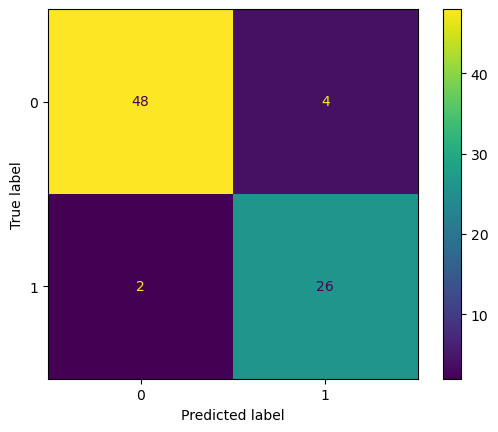

In [46]:
disp.plot()
plt.show()